<a href="https://colab.research.google.com/github/MoonRiver75/CV_html/blob/main/Netflix01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Listado de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargar los datos de origen

In [ ]:
netflix = pd.read_csv('netflix_titles.csv')

In [ ]:
netflix.shape

(8807, 12)

El dataset contine 8807 datos a 12 atributos

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB




*   El campo date_added se identifico como tipo object y no como datetime
*   Algunas columnas no tienen todos los datos


In [ ]:
netflix.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.0,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4


show_id y description son columnas que no parecen importantes en este momento

In [ ]:
netflix.head(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


Las columnas director, cast, country y listed_in necesitan datos.
Columna duration tiene minutos y temporadas

#Limpieza

In [ ]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Verificar el porcentaje de NULL por cada columna
for i in netflix.columns:
  null_ratio = netflix[i].isna().sum() / len(netflix) * 100
  if null_ratio > 0 :
    print(f"Columna {i} tiene nullos: {round(null_ratio,2)}%")

Columna director tiene nullos: 29.91%
Columna cast tiene nullos: 9.37%
Columna country tiene nullos: 9.44%
Columna date_added tiene nullos: 0.11%
Columna rating tiene nullos: 0.05%
Columna duration tiene nullos: 0.03%


In [ ]:
# Actualizar las columnas de director, cast, country y sustituir los NULL por NA
data = netflix.copy()
data[['director','cast','country']]=netflix.loc[:,['director','cast','country']].fillna('NA')

In [ ]:
# Llenar los valores faltantes para date_added, rating y duration
data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data.rating.fillna(data.rating.mode()[0],inplace=True)

In [ ]:
data.rating.value_counts(dropna=False)

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
data.loc[data.rating.str.contains('min'), 'duration'] = data.loc[data.rating.str.contains('min'),'rating']
data.loc[data.rating.str.contains('min'),'rating'] = data.rating.mode()[0]

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
def explode_data(df, col : str, name : str, along:str = 'year_added'):
    return (
    data
        [col]
        .apply(lambda x: x.replace(', ', ',').replace(' ,', ',').split(','))
        .to_frame()
        .set_index(data[along])
        .explode(col)
        .replace('', np.nan)
        .replace('NA', np.nan)
        .dropna()
        .stack()
        .to_frame()
        .reset_index()
        .drop('level_1', axis=1)
        .rename(columns={0:name})
)

Convertir tipo de columna

In [ ]:
# Convertir 'date_added'a datetime y agregrar la nueva columna
data.date_added = pd.to_datetime(data.date_added)
data['year_added'] = data.date_added.dt.year
data['month_added'] = data.date_added.dt.month_name()
data['day_added'] = data.date_added.dt.day_name()

# Convertir

data = data.astype({
   'type':'category',
   'rating':'category'
})

Analisis y vizualización

In [ ]:
sns.set_theme()

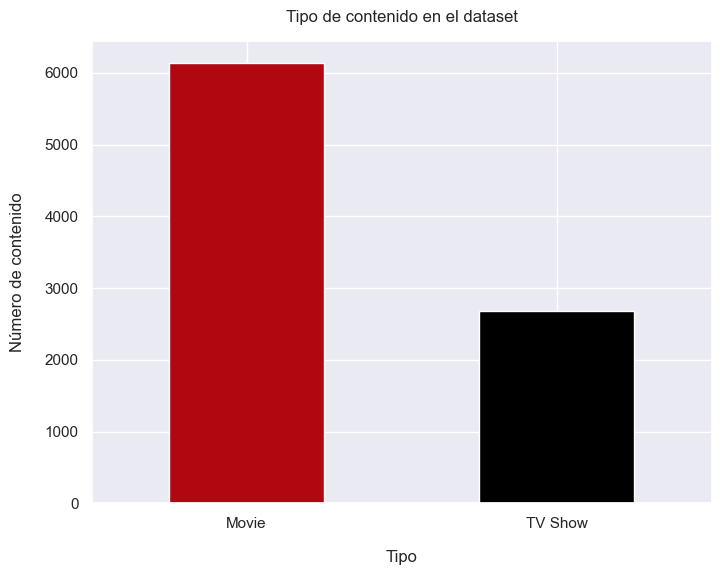

In [ ]:
ax = data.type.value_counts().plot(kind='bar', figsize=(8,6), rot=0, color=["#B00710","#000000"])
ax.set_xlabel('Tipo', labelpad=14)
ax.set_ylabel('Número de contenido', labelpad=14)
ax.set_title('Tipo de contenido en el dataset', pad=14)
plt.show()

Después de 2015 se observa el incremento de contenido.
Se han agregado más pelicas que series, (el doble?)
A partir del 2019 inicia un decremento a causa del COVID

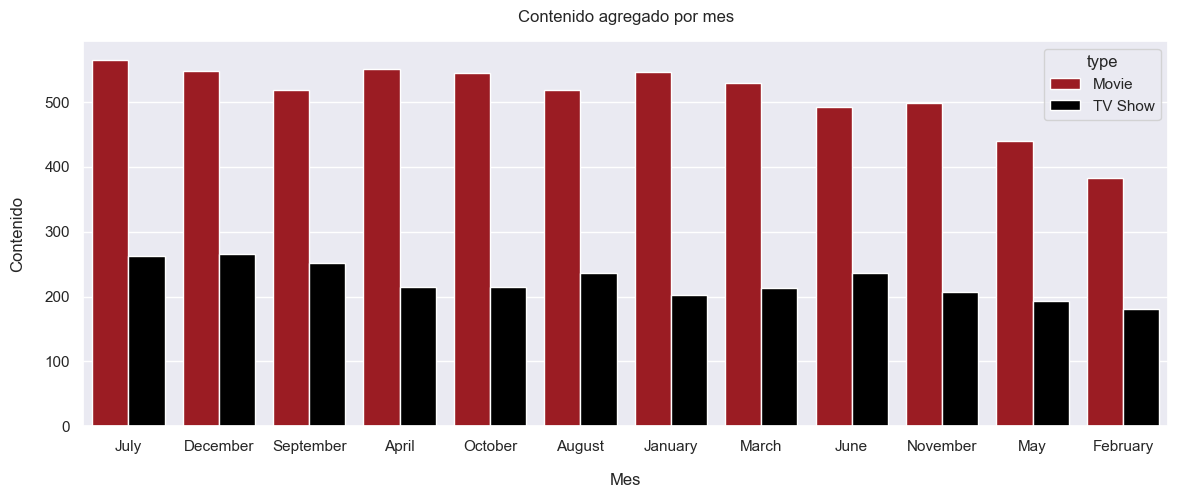

In [ ]:
# Cantidad de contentenido agregado por mes

fig, ax = plt.subplots(figsize=(14, 5))

ax = sns.countplot(x='month_added',
                   data=data, hue='type',
                   order=data.month_added.value_counts().index,
                   palette=["#B00710","#000000"])

ax.set_xlabel('Mes', labelpad=14)
ax.set_ylabel('Contenido', labelpad=14)
ax.set_title('Contenido agregado por mes', pad=14)
plt.show()

Los meses de Julio y Diciembre son donde más se agrego contenido.
El número de contenido agregado de peliculas es mayor al de Series, mes a mes.

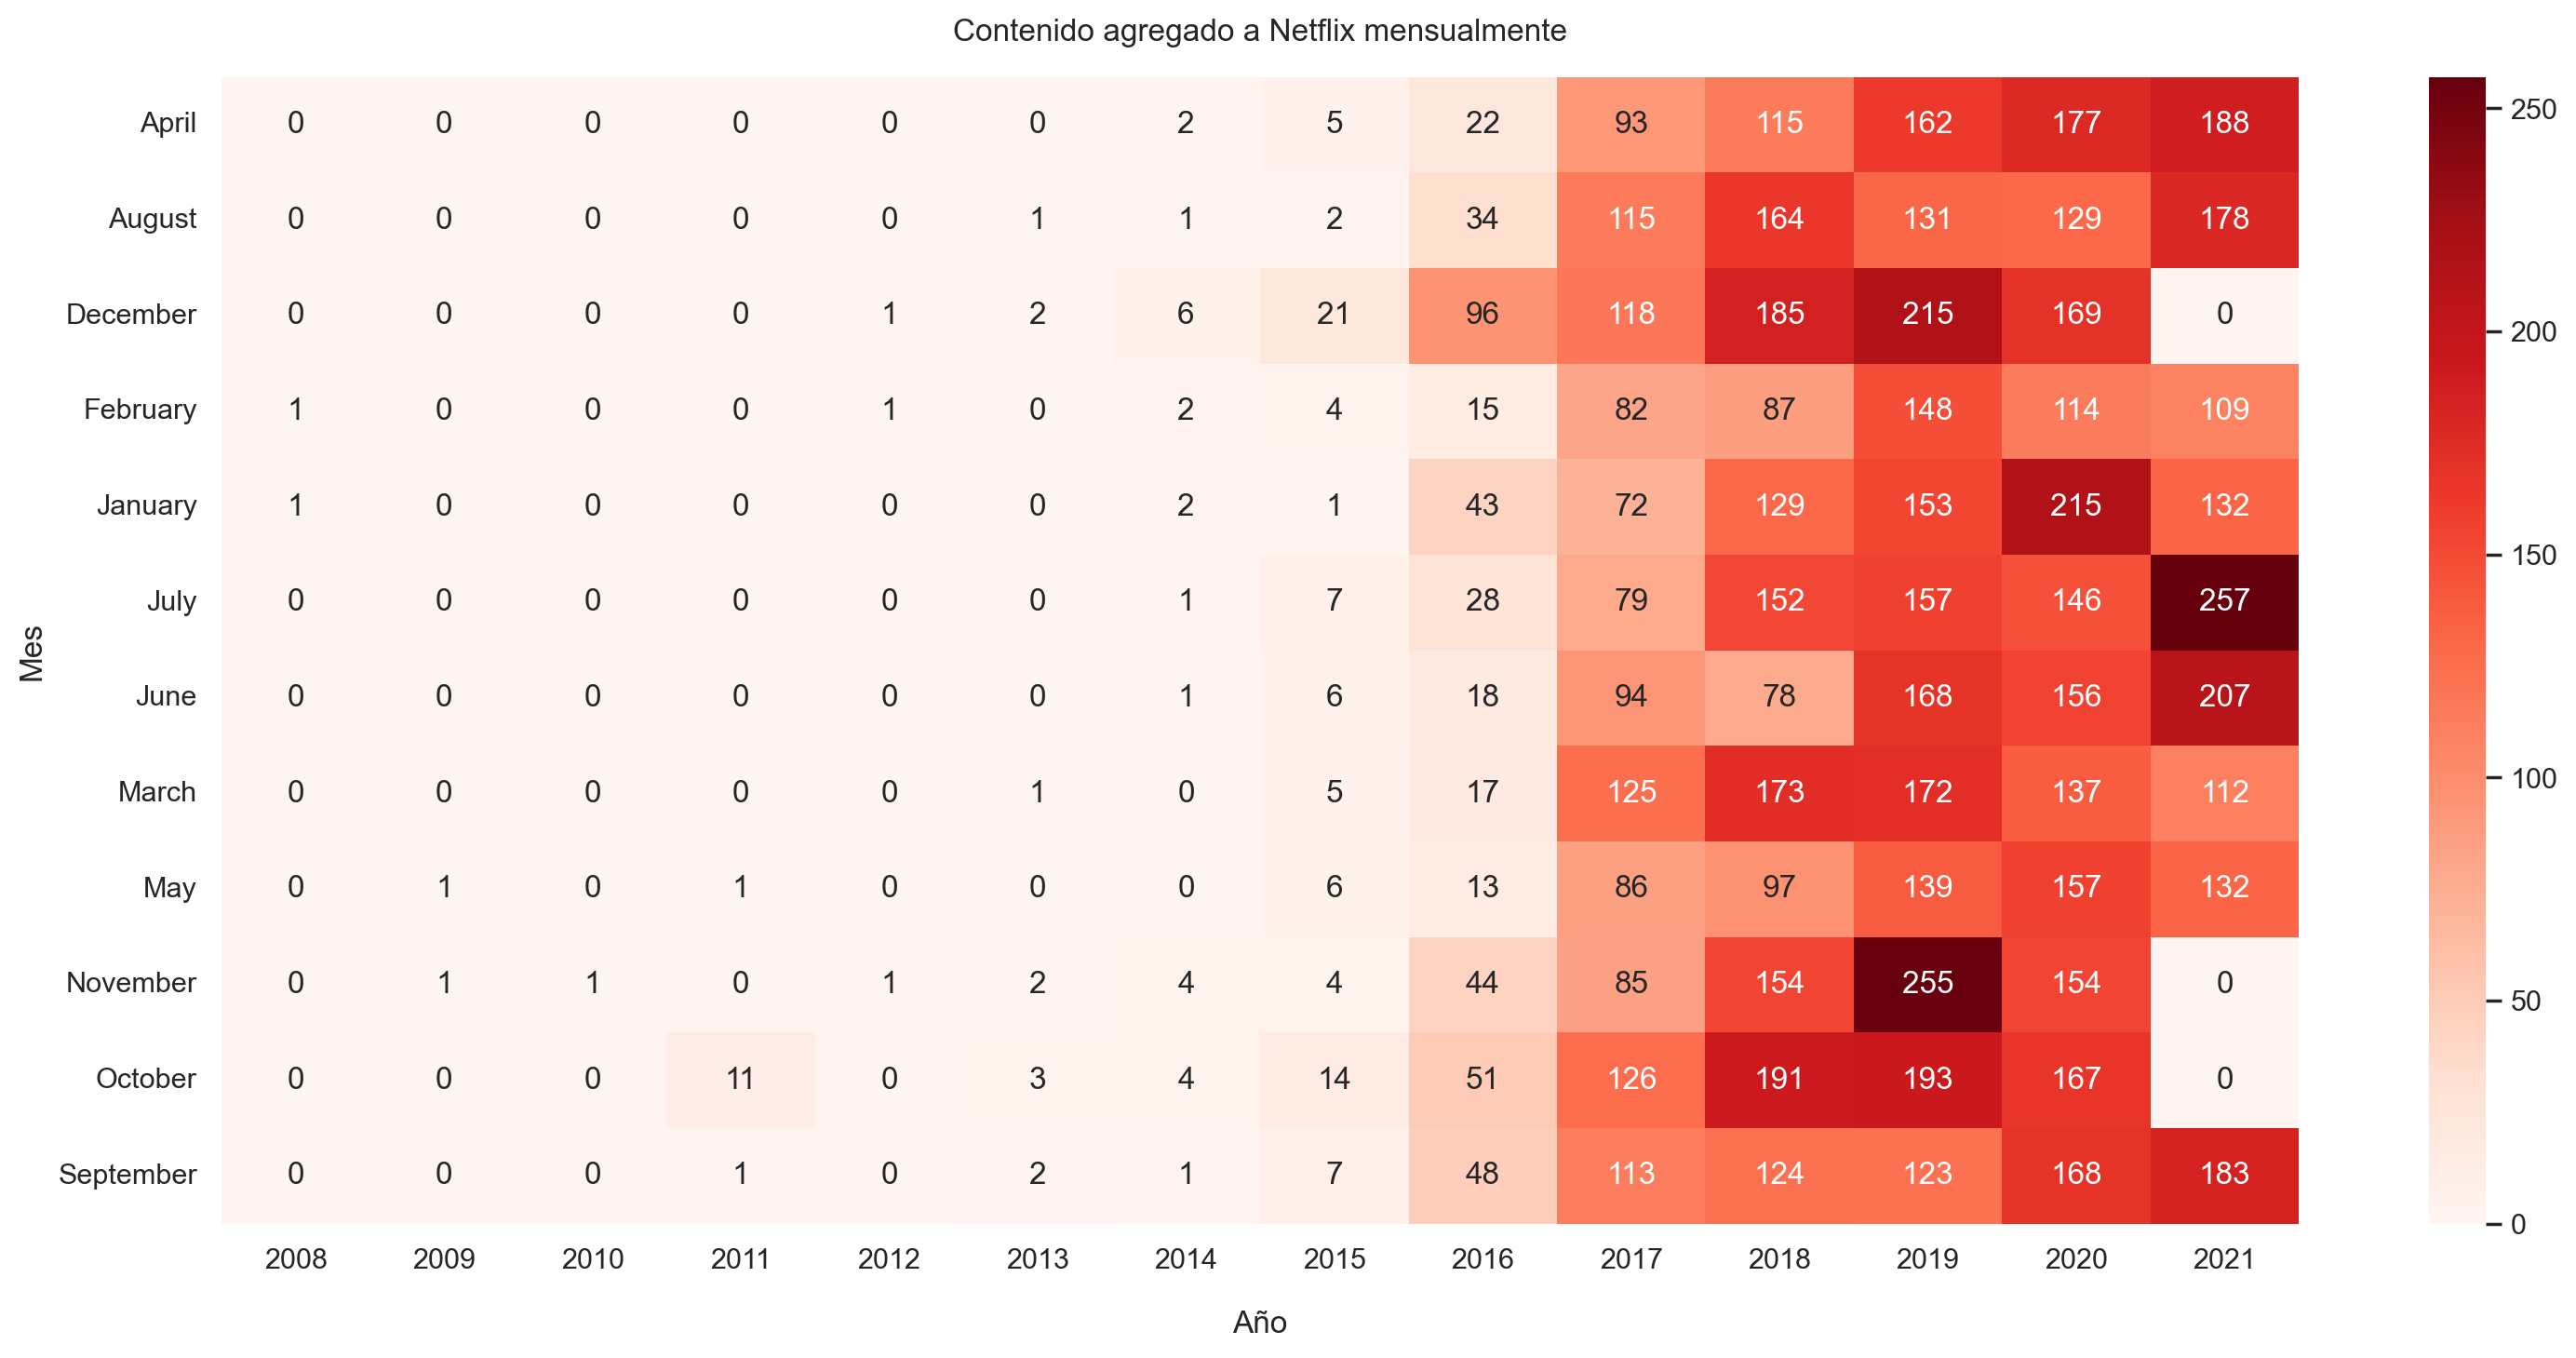

In [ ]:
# Contenido agregado mensualmente por año
year_month_count = (
                    data
                    .loc[:,['year_added', 'month_added']]
                    .value_counts()
                    .reset_index()
                    .rename(columns={0:'count'})
                    .pivot("month_added", "year_added", "count")
                    .fillna(0)
                    .apply(lambda x: x.astype('int'))
                )

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(year_month_count, annot=True, fmt="d", cmap='Reds')
ax.set_xlabel('Año', labelpad=14)
ax.set_ylabel('Mes')
ax.set_title('Contenido agregado a Netflix mensualmente', pad=14)
plt.show()

Antes de 2021, el contenido agregado en julio no es muy alto.

Si no tenemos en cuenta el contenido añadido en 2021, ya que no tenemos datos de todos los meses, se añade más contenido en octubre, noviembre y diciembre.

Para el año 2021 no tenemos datos después de septiembre.

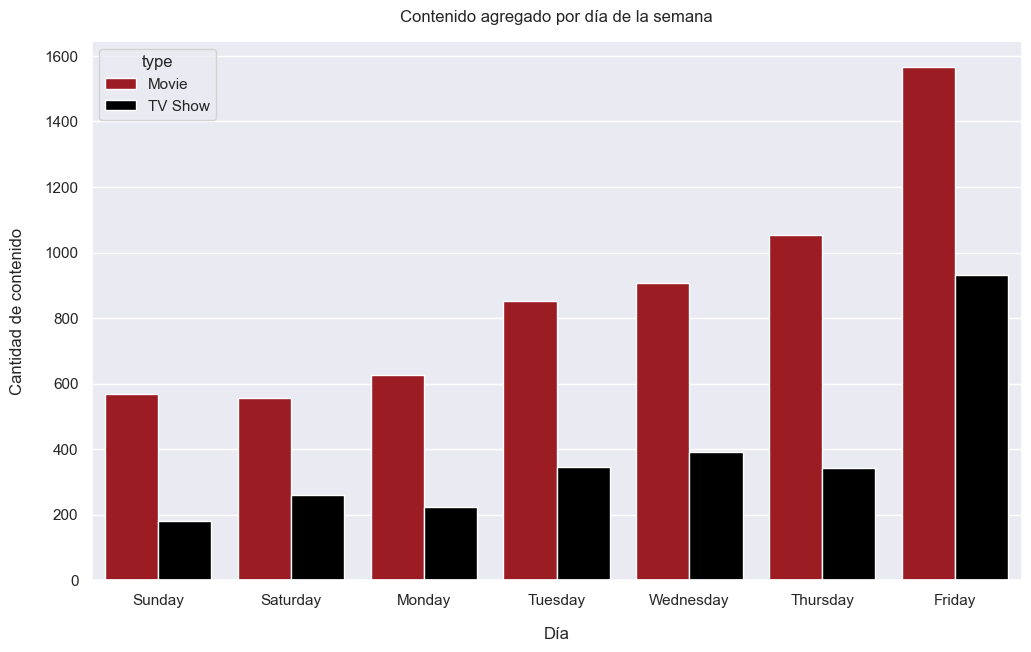

In [ ]:
# Contenido agregado por día de la semana
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='day_added',data=data,
                   hue='type',
                   order=data.day_added.value_counts().sort_values().index,
                   palette=["#B00710","#000000"])

#ax.set_title('Contenido agregado por día de la semana')
ax.set_xlabel('Día', labelpad=14)
ax.set_ylabel('Cantidad de contenido', labelpad=14)
ax.set_title('Contenido agregado por día de la semana', pad=14)
plt.show()

*   Gran cantidad de contendido agregado los días viernes.
*   Los viernes se agrega un número significativo de programas de televisión más que otros días.

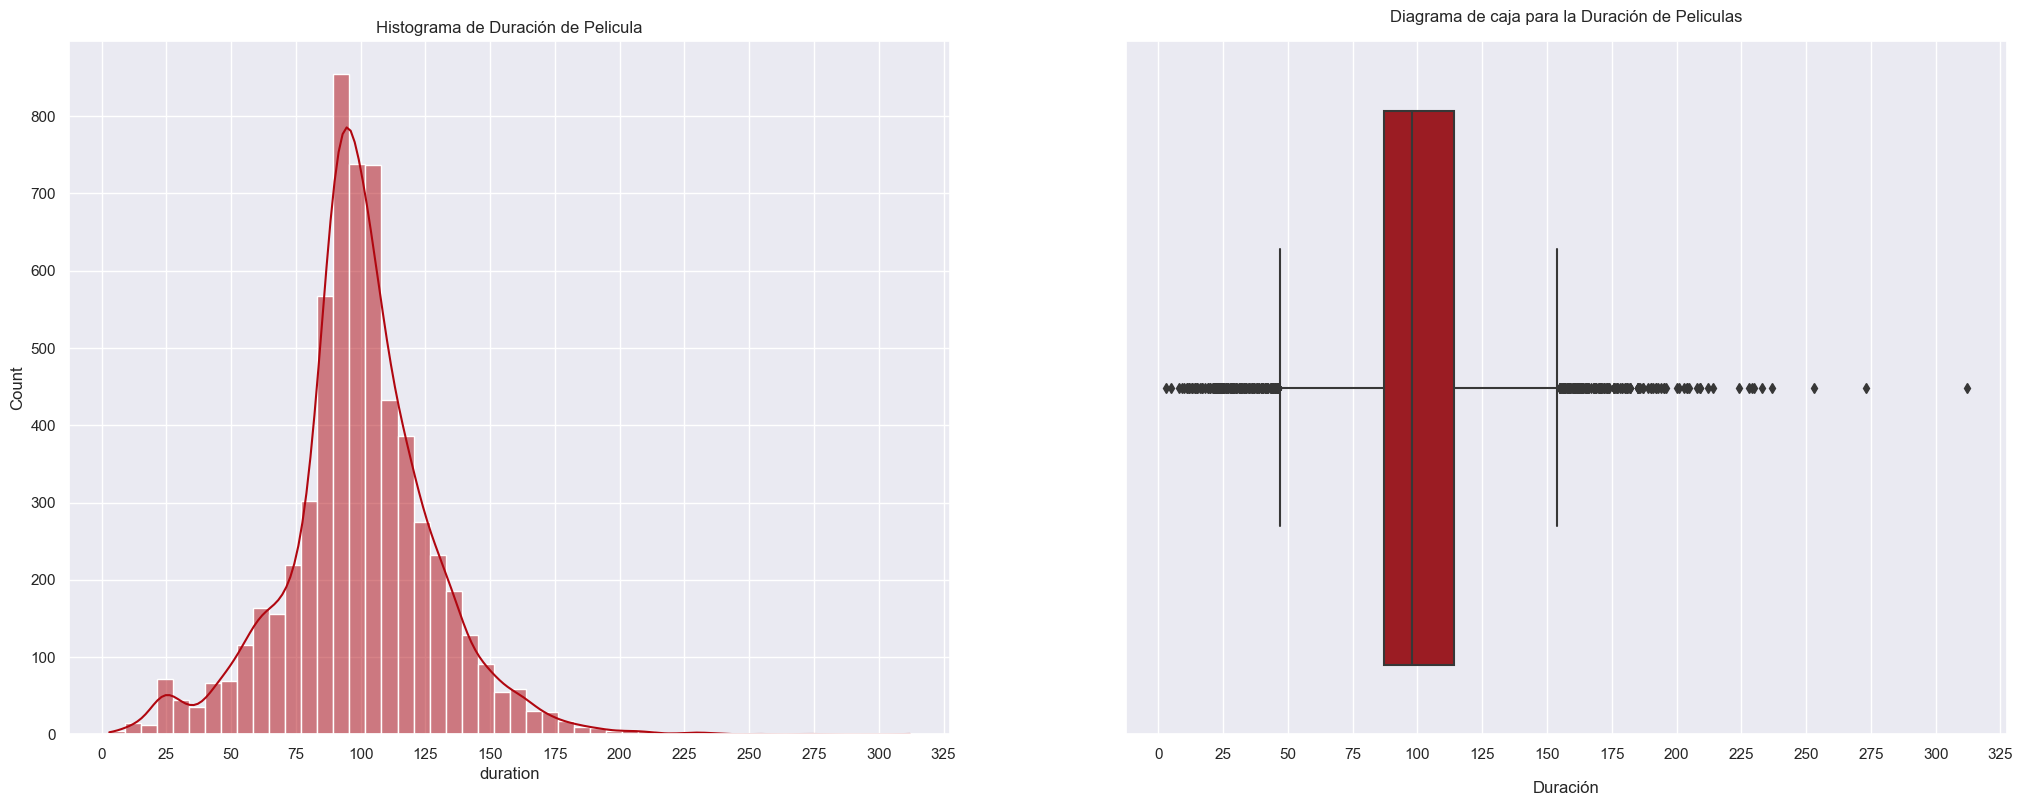

In [ ]:
# Cuál es la duración más común de una pelicula?
movie_durations = data[data['duration'].str.contains('min')]['duration'].apply(lambda x: x.split()[0]).astype('int')

# Histograma utilizando KDE
# Un gráfico de estimación de densidad del núcleo (KDE) es un método para visualizar
# la distribución de observaciones en un conjunto de datos, análogo a un histograma.
# KDE representa los datos utilizando una curva de densidad de probabilidad continua en una o más dimensiones.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,9))
g = sns.histplot(movie_durations, kde=True, color="#B00710", bins=50, ax = ax1)
ax1.set_title('Histograma de Duración de Pelicula')
g.set(xticks=np.arange(0, 350, 25))

# Gráfico de caja
sns.boxplot(x=movie_durations, color="#B00710", ax = ax2)
ax2.set_xticks(np.arange(0,350, 25))
ax2.set_xlabel('Duración', labelpad=14)
ax2.set_title('Diagrama de caja para la Duración de Peliculas', pad=14)
plt.show()


*   Generalmente las peliculas duran alrededor de 100 minutos
*   También existe un pico alrededor de los 25 minutos debido a cortometrajes

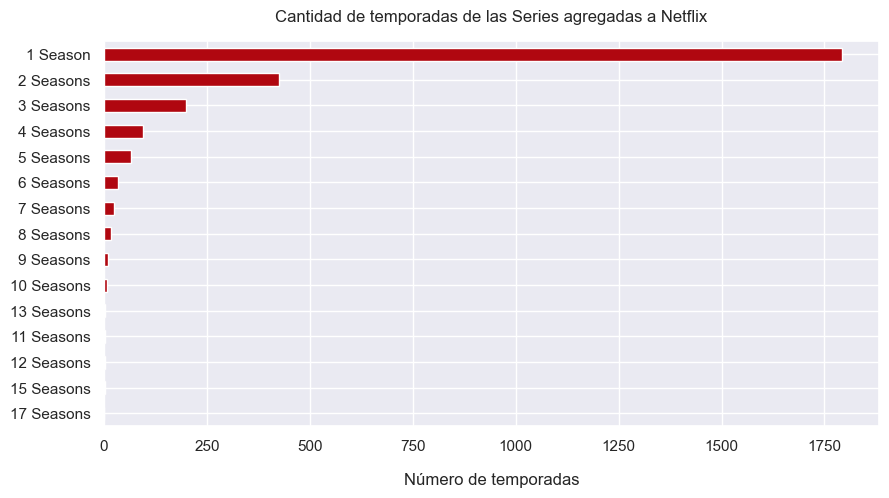

In [ ]:
# Cuál es el número de temporadoas más común en Netflix?
seasons = data[data['duration'].str.contains('Season')]['duration']

plt.figure(figsize=(10,5), dpi=100)
ax = seasons.value_counts().sort_values().plot(y='duration', kind='barh',color=["#B00710"])
ax.set_title('Content added per week day')
ax.set_xlabel('Número de temporadas', labelpad=14)

ax.set_title('Cantidad de temporadas de las Series agregadas a Netflix', pad=14)
plt.show()

*   Los programas de televisión son de 1 a 2 temporadas en su mayoría.
*   Lo más común es que las series solamente duren una temporada.

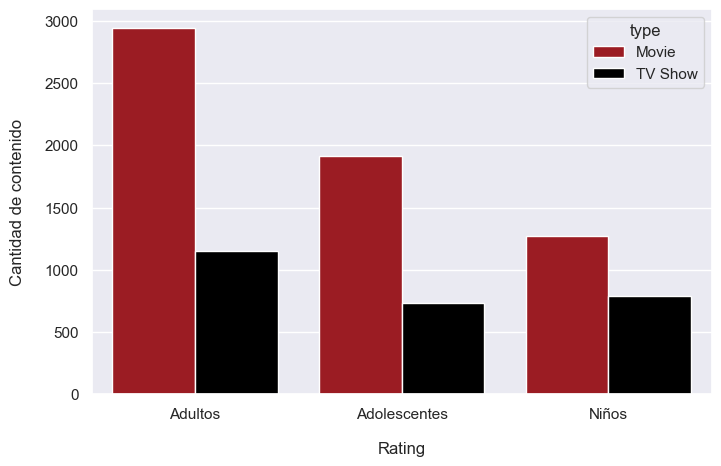

In [ ]:
# Cantidad de contenido por tipo de audiencia

# Hacemos la división de la audiencia en tres tipos
Kids = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'TV-Y7-FV']
Teens = ['PG-13', 'TV-14']
Adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

def rate(x):
    if x in Kids:
        return 'Niños'
    elif x in Teens:
        return 'Adolescentes'
    elif x in Adults:
        return 'Adultos'

df1 = data['rating'].apply(rate)
df2 = pd.concat([df1, data['type']], axis=1)
plt.figure(figsize=(8,5), dpi=100)
ax = sns.countplot(x='rating',data=df2, hue='type', order=['Adultos', 'Adolescentes', 'Niños'], palette=["#B00710","#000000"])
ax.set_ylabel('Cantidad de contenido', labelpad=14)
ax.set_xlabel('Rating', labelpad=14)
plt.show()

*   Netflix agregó muchas películas para adultos en comparación con los programas de televisión para adultos.
*   El contenido para adultos y adolescentes es el contenido más común en Netflix.

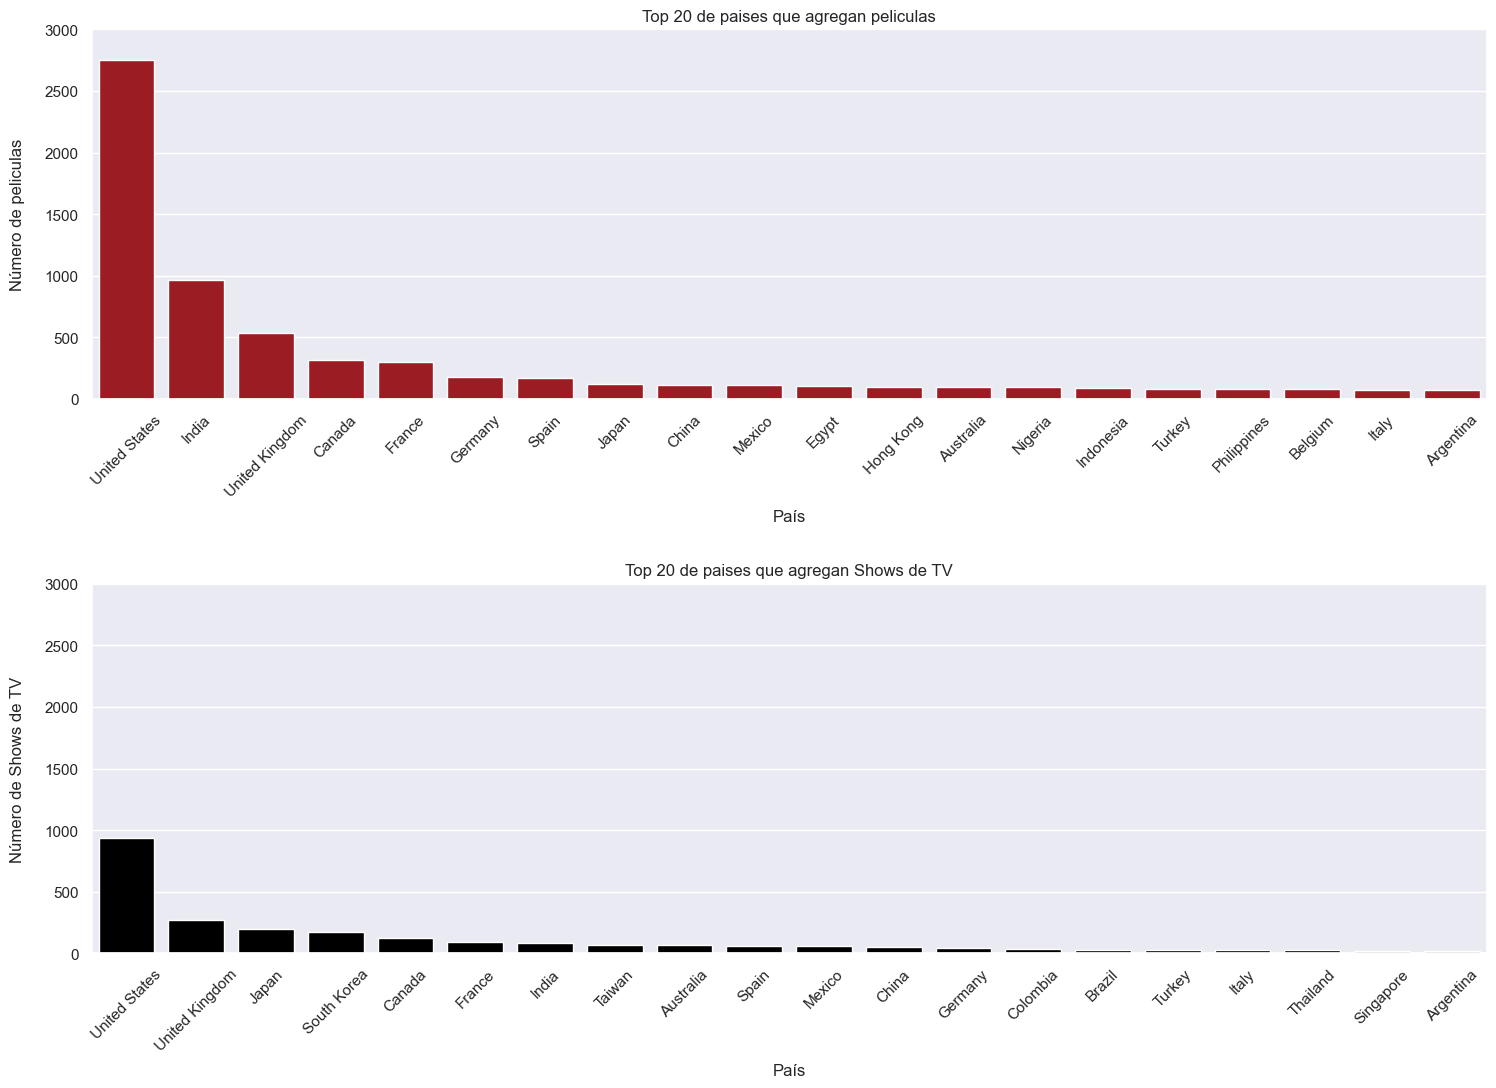

In [ ]:
# Cuál es el top 20 de paises por tipo de contenido?
country_data = explode_data(data, 'country', 'country', 'type')
df = country_data.value_counts().reset_index(level=1)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,12))
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='country',y =0, data=df.loc['Movie'].head(20), color="#B00710", ax=ax1, )
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_title('Top 20 de paises que agregan peliculas')
ax1.set_ylabel('Número de peliculas', labelpad=14)
ax1.set_xlabel('País', labelpad=7)
ax1.set_yticks(np.arange(0,3500,500))


sns.barplot(x='country',y =0, data=df.loc['TV Show'].head(20), color="#000000", ax = ax2)
ax2.set_title('Top 20 de paises que agregan Shows de TV')
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_ylabel('Número de Shows de TV', labelpad=14)
ax2.set_xlabel('País', labelpad=7)
ax2.set_yticks(np.arange(0,3500,500))
plt.show()

*   El orden del Top 20 de películas y programas de televisión es diferente.
*   En países como India, España, y Alemania las películas son más populares que los programas de televisión.
*   En países como Japón, Corea del Sur y Taiwán, los programas de televisión son más populares que las películas.

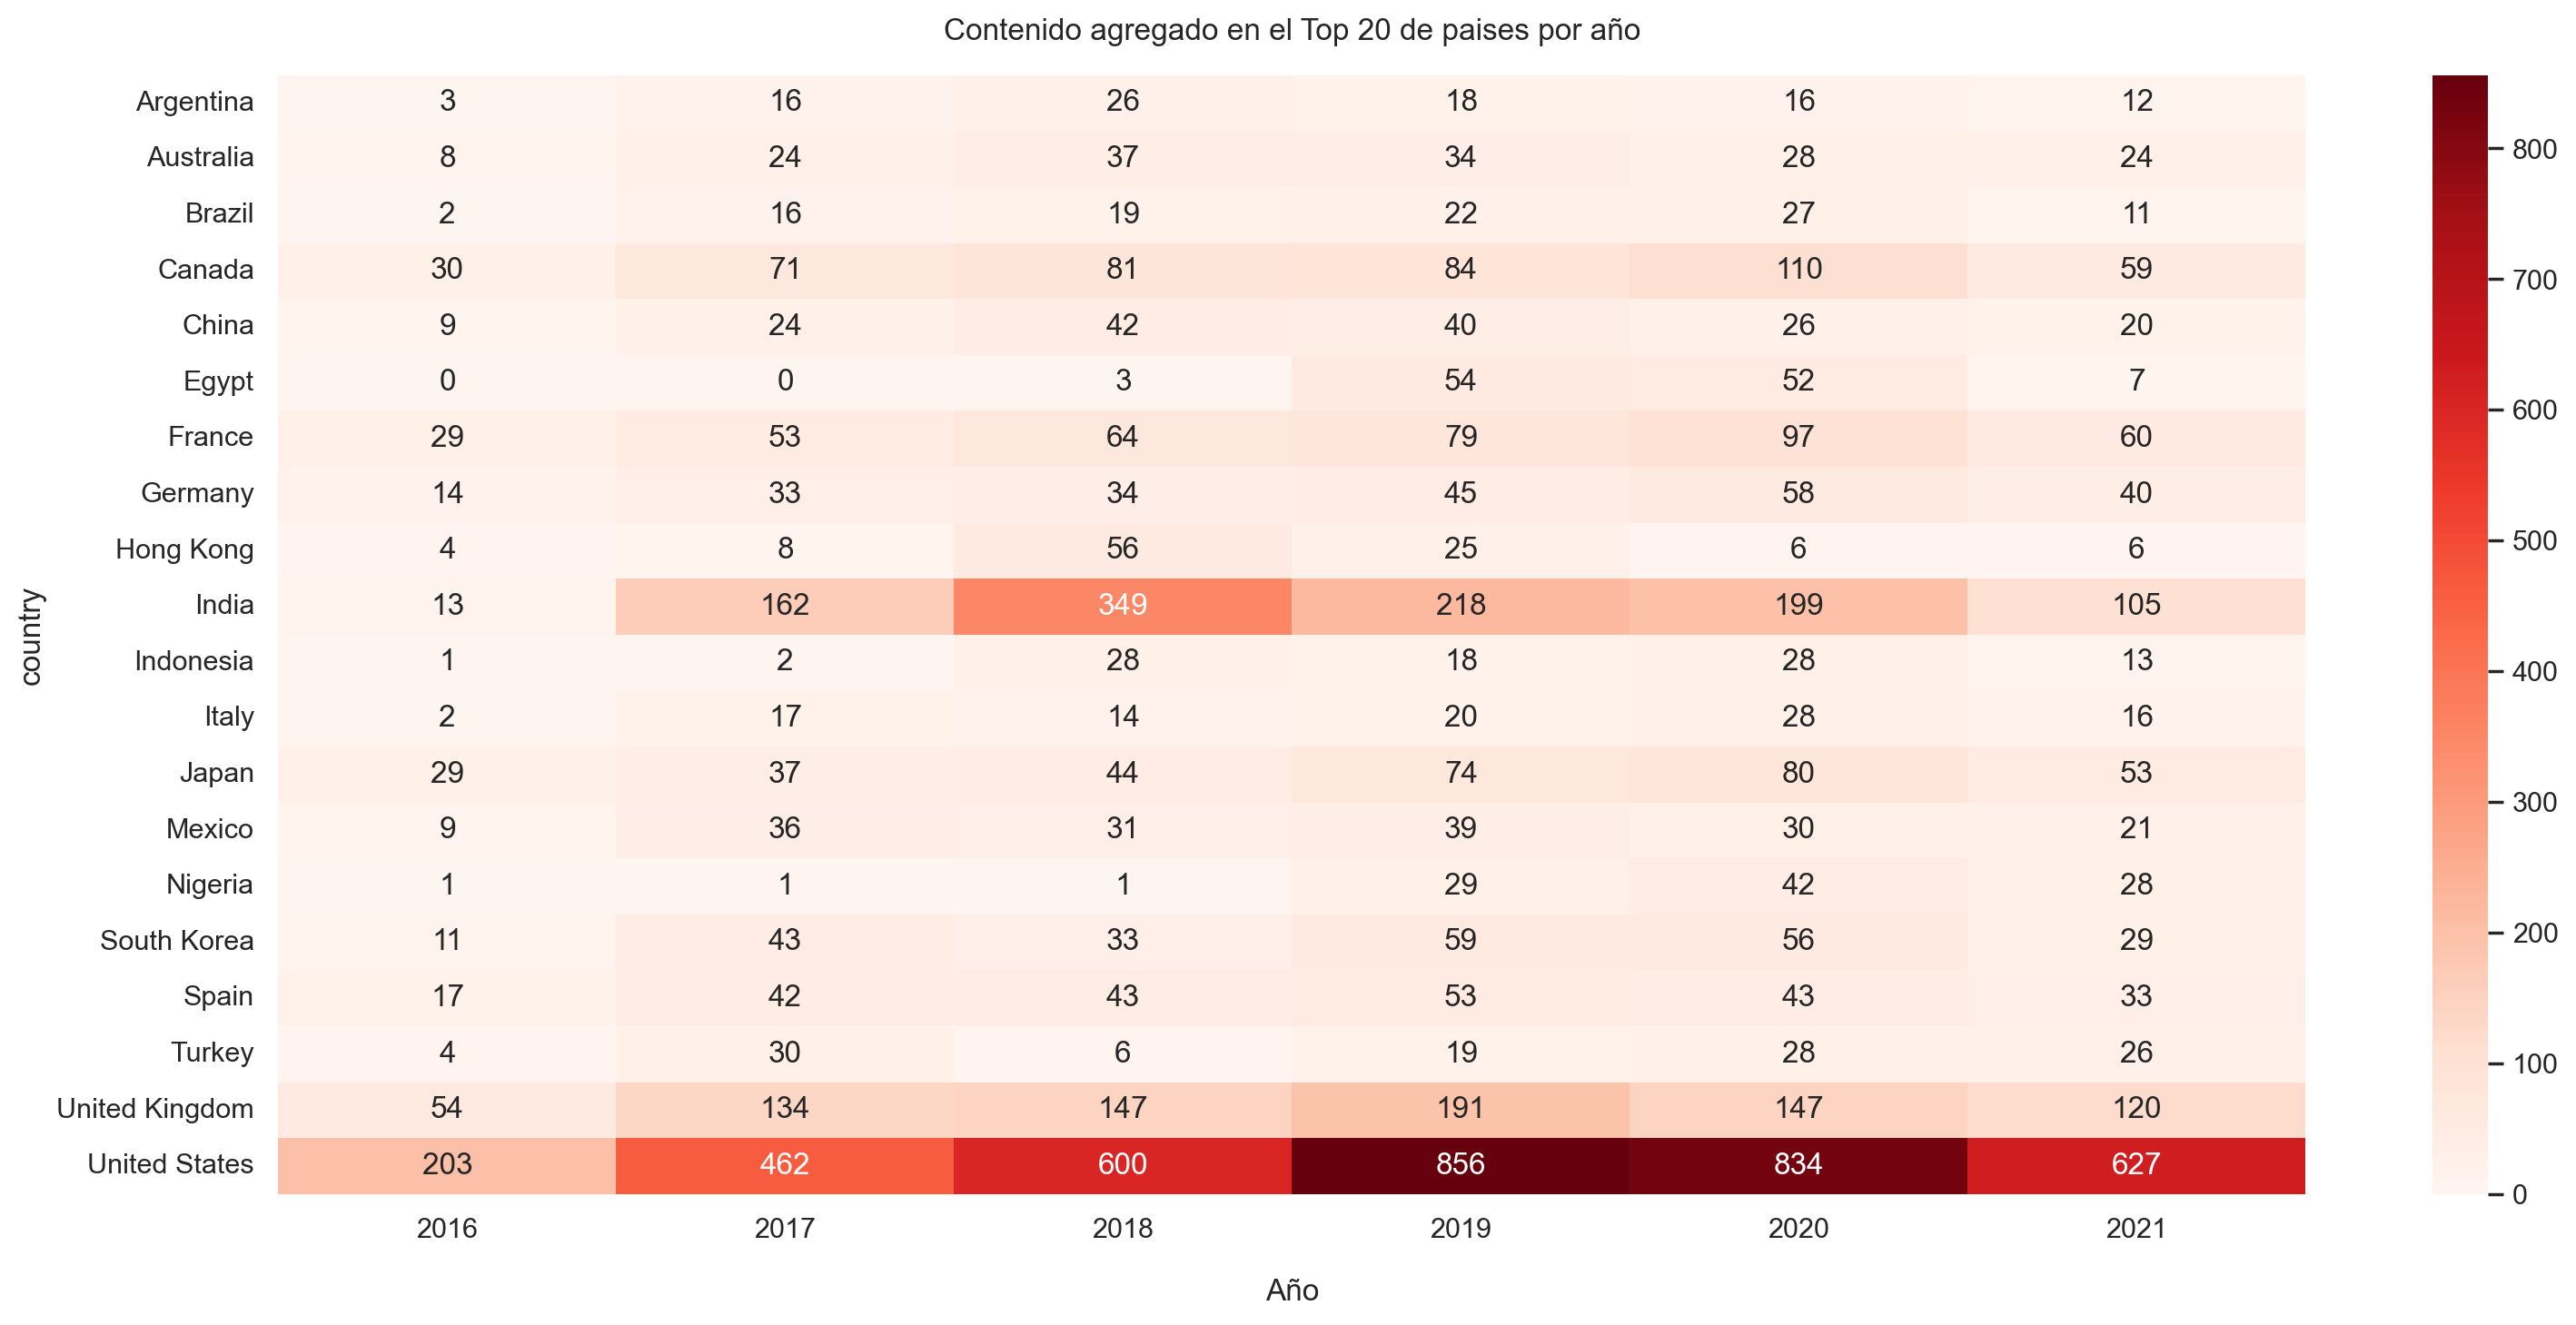

In [ ]:
# Mapa de calor de cantidad de contenido agregado por el top 20 de paises por año
country_data = explode_data(data, 'country', 'country')

country_data = country_data[country_data['year_added']>2015]
country_data = (
    country_data
    [country_data['country'].isin(country_data['country'].value_counts().head(20).index)]
    .value_counts()
    .reset_index()
    .pivot("country", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(country_data, annot=True, fmt="d", cmap='Reds')

ax.set_xlabel('Año', labelpad=14)
ax.set_title('Contenido agregado en el Top 20 de paises por año', pad=14)
plt.show()

Los 5 países principales donde Netflix agrega más contenido por año, excepto Estados Unidos, son India, Reino Unido, Canadá, Francia y Japón.

In [ ]:
# - Top de generos en Netflix
genre_data = explode_data(data, 'listed_in', 'genre', 'type')
df = genre_data.value_counts().reset_index(level=1)

fig, ax = plt.subplots(2,1, figsize=(10, 8))

fig.subplots_adjust(hspace=0.9)
sns.barplot(x=0,y ='genre', data=df.loc['Movie'].head(10), color="#B00710", ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Pelicula')
ax[0].set_xticks(np.arange(0,3500,500))

sns.barplot(x=0,y ='genre', data=df.loc['TV Show'].head(10), color="#000000", ax=ax[1])
ax[1].set_xlabel('Cantidad de contenido', labelpad=14)
ax[1].set_ylabel('Show de TV')
ax[1].set_xticks(np.arange(0,3500,500))
fig.suptitle('Top 10 de Géneros de Peliculas y Show de TV agregados a  Netflix')
fig.tight_layout()

NameError: ignored

In [ ]:
'''Podemos concluir que en las películas, uno de los géneros más revisados son las películas internacionales.
Entre los tres géneros principales, se encuentran las películas internacionales, los dramas y las comedias.
Por otro lado, los géneros de musicales se encuentran entre los menos populares, mientras que los documentales y el género de acción comparten cifras similares.

Por otro lado, los programas de televisión (TV shows) también tienen como más populares los de tipo internacional,
y siguen un orden similar al top 3 de las películas: en primer lugar, internacional, dramas y comedias.
Los reality shows y los programas británicos comparten números de popularidad similares.

La cantidad de contenido es mayor en las películas que en los shows. '''




Conclusión

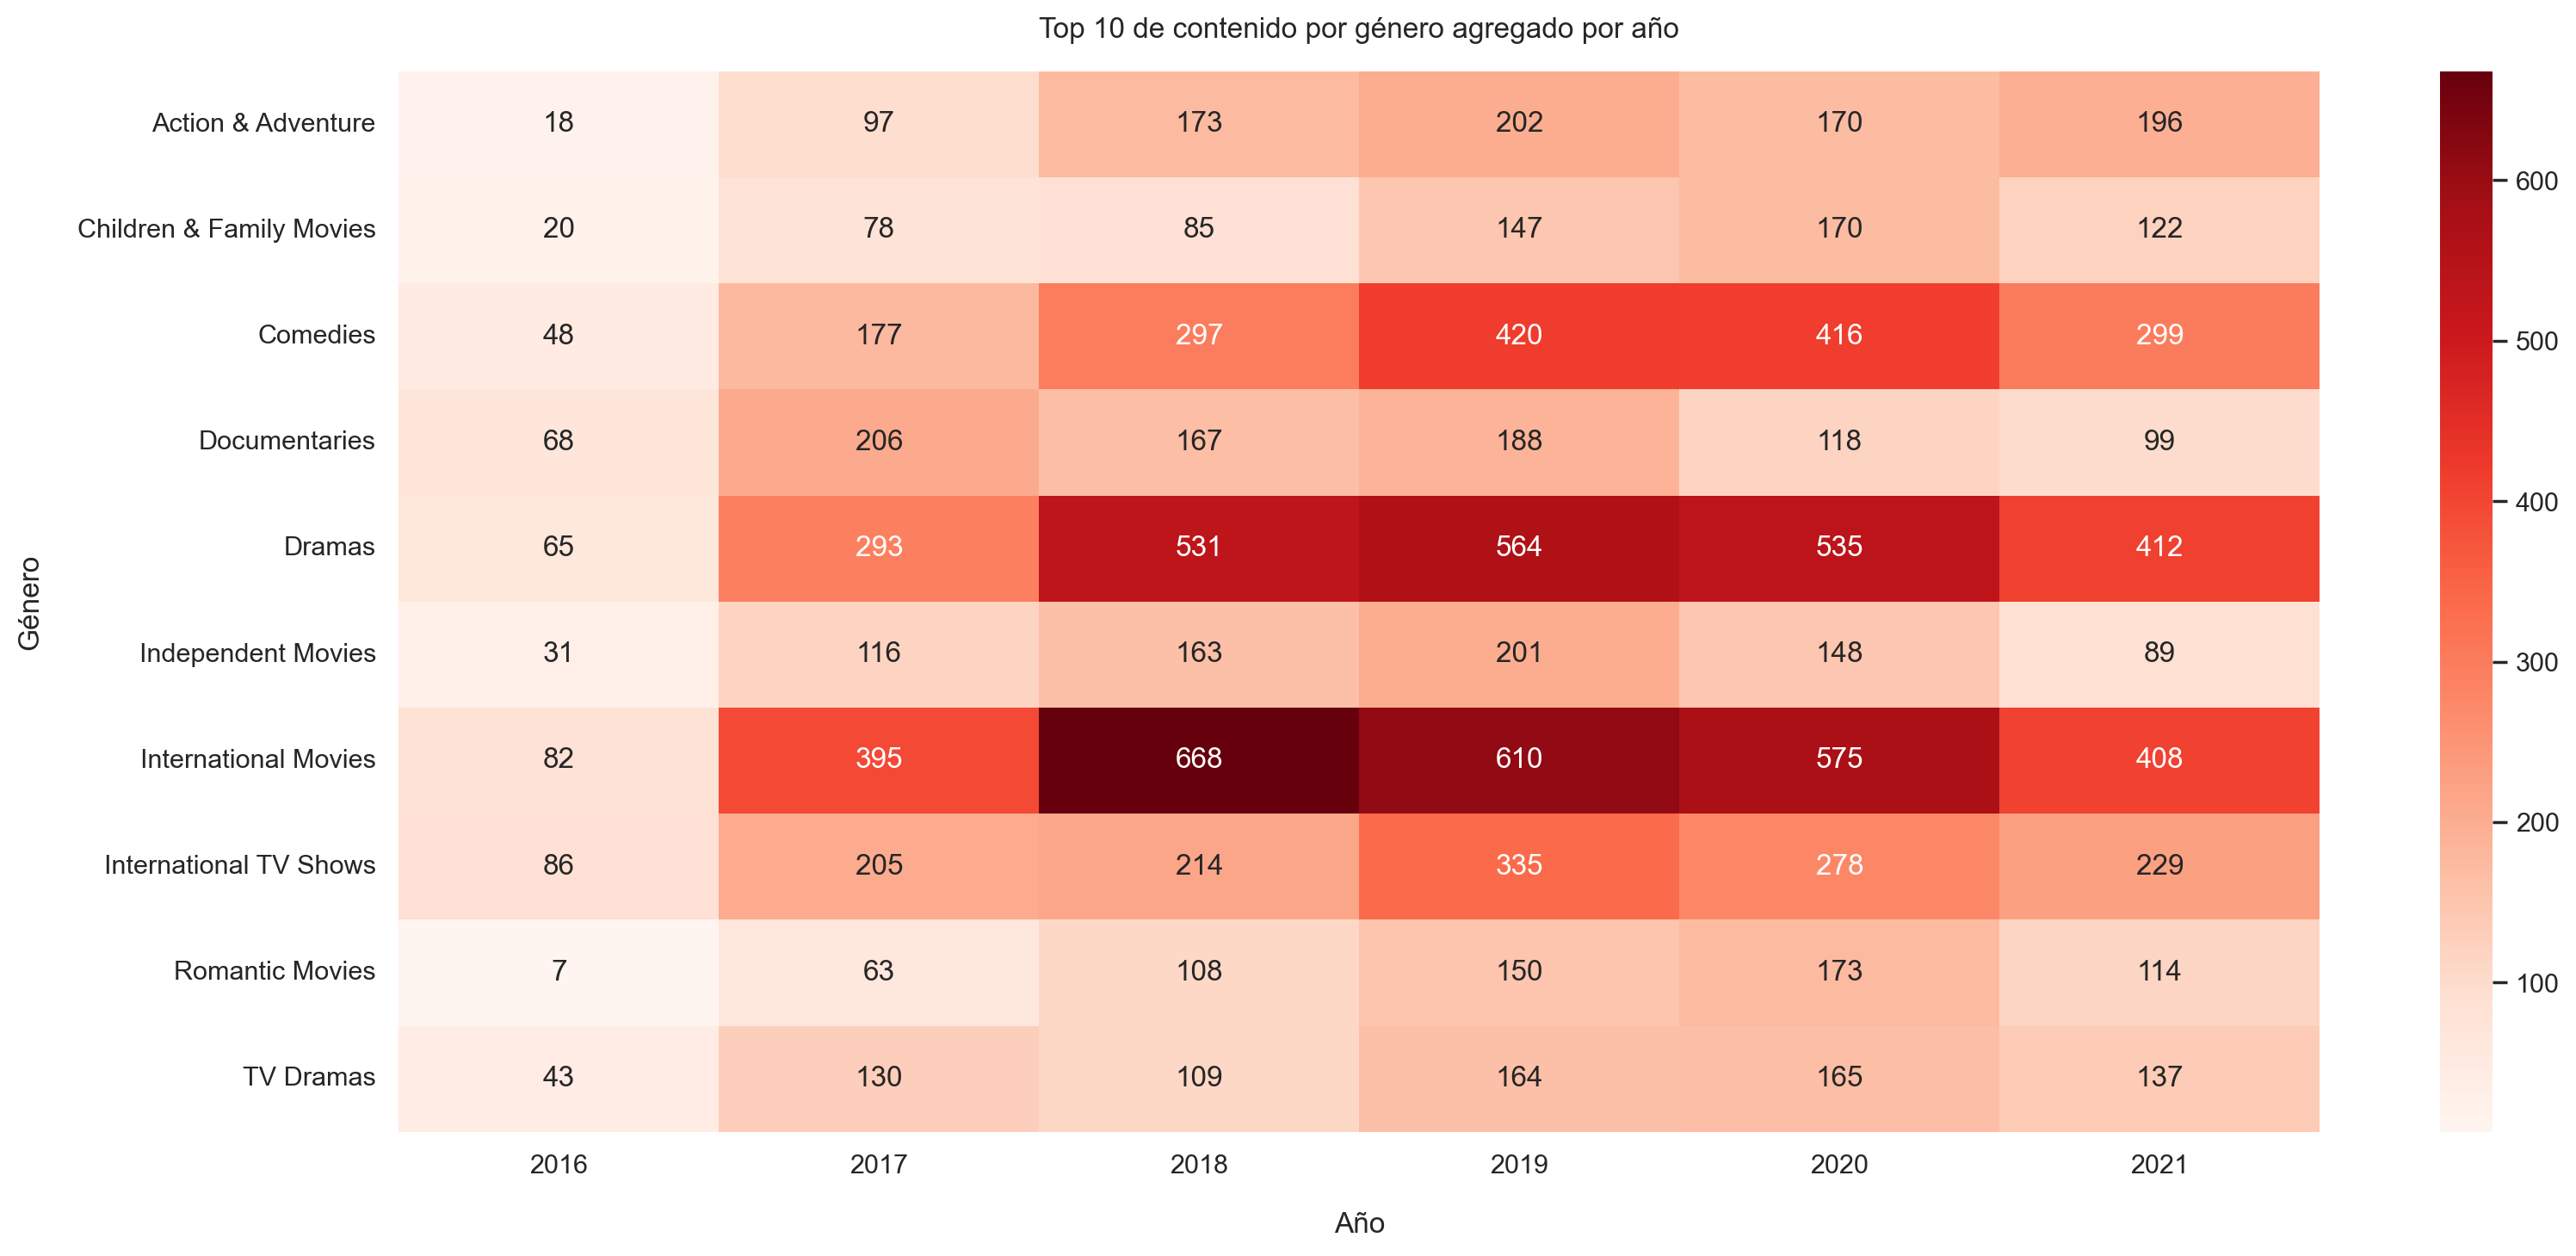

In [ ]:
# Cuales son los géneros más populares agregados a Netflix?

genre_data = explode_data(data, 'listed_in', 'genre')

genre_data = genre_data[genre_data['year_added']>2015]
genre_data = (
    genre_data
    [genre_data['genre'].isin(genre_data['genre'].value_counts().head(10).index)]
    .value_counts()
    .reset_index()
    .pivot("genre", "year_added", 0)
    .fillna(0)
    .apply(lambda x: x.astype('int'))
)

plt.figure(figsize=(18,8), dpi=200)
ax = sns.heatmap(genre_data, annot=True, fmt="d", cmap='Reds')

ax.set_xlabel('Año', labelpad=14)
ax.set_ylabel('Género', labelpad=14)
ax.set_title('Top 10 de contenido por género agregado por año', pad=14)
plt.show()

In [ ]:
''' En el año 2016, la categoría con más contenidos agregados fue la de shows internacionales,
manteniendo un récord al ser la categoría en la que se agregó más contenido hasta el año 2021,
donde solo es superada por cuatro cifras por el género drama.
Los géneros con menos contenido agregado son la acción y la aventura, para niños y familiares, románticas y dramas.
Las dos categorías que más contenido se ha agregado son dramas y películas internacionales.
 '''


Conclusión

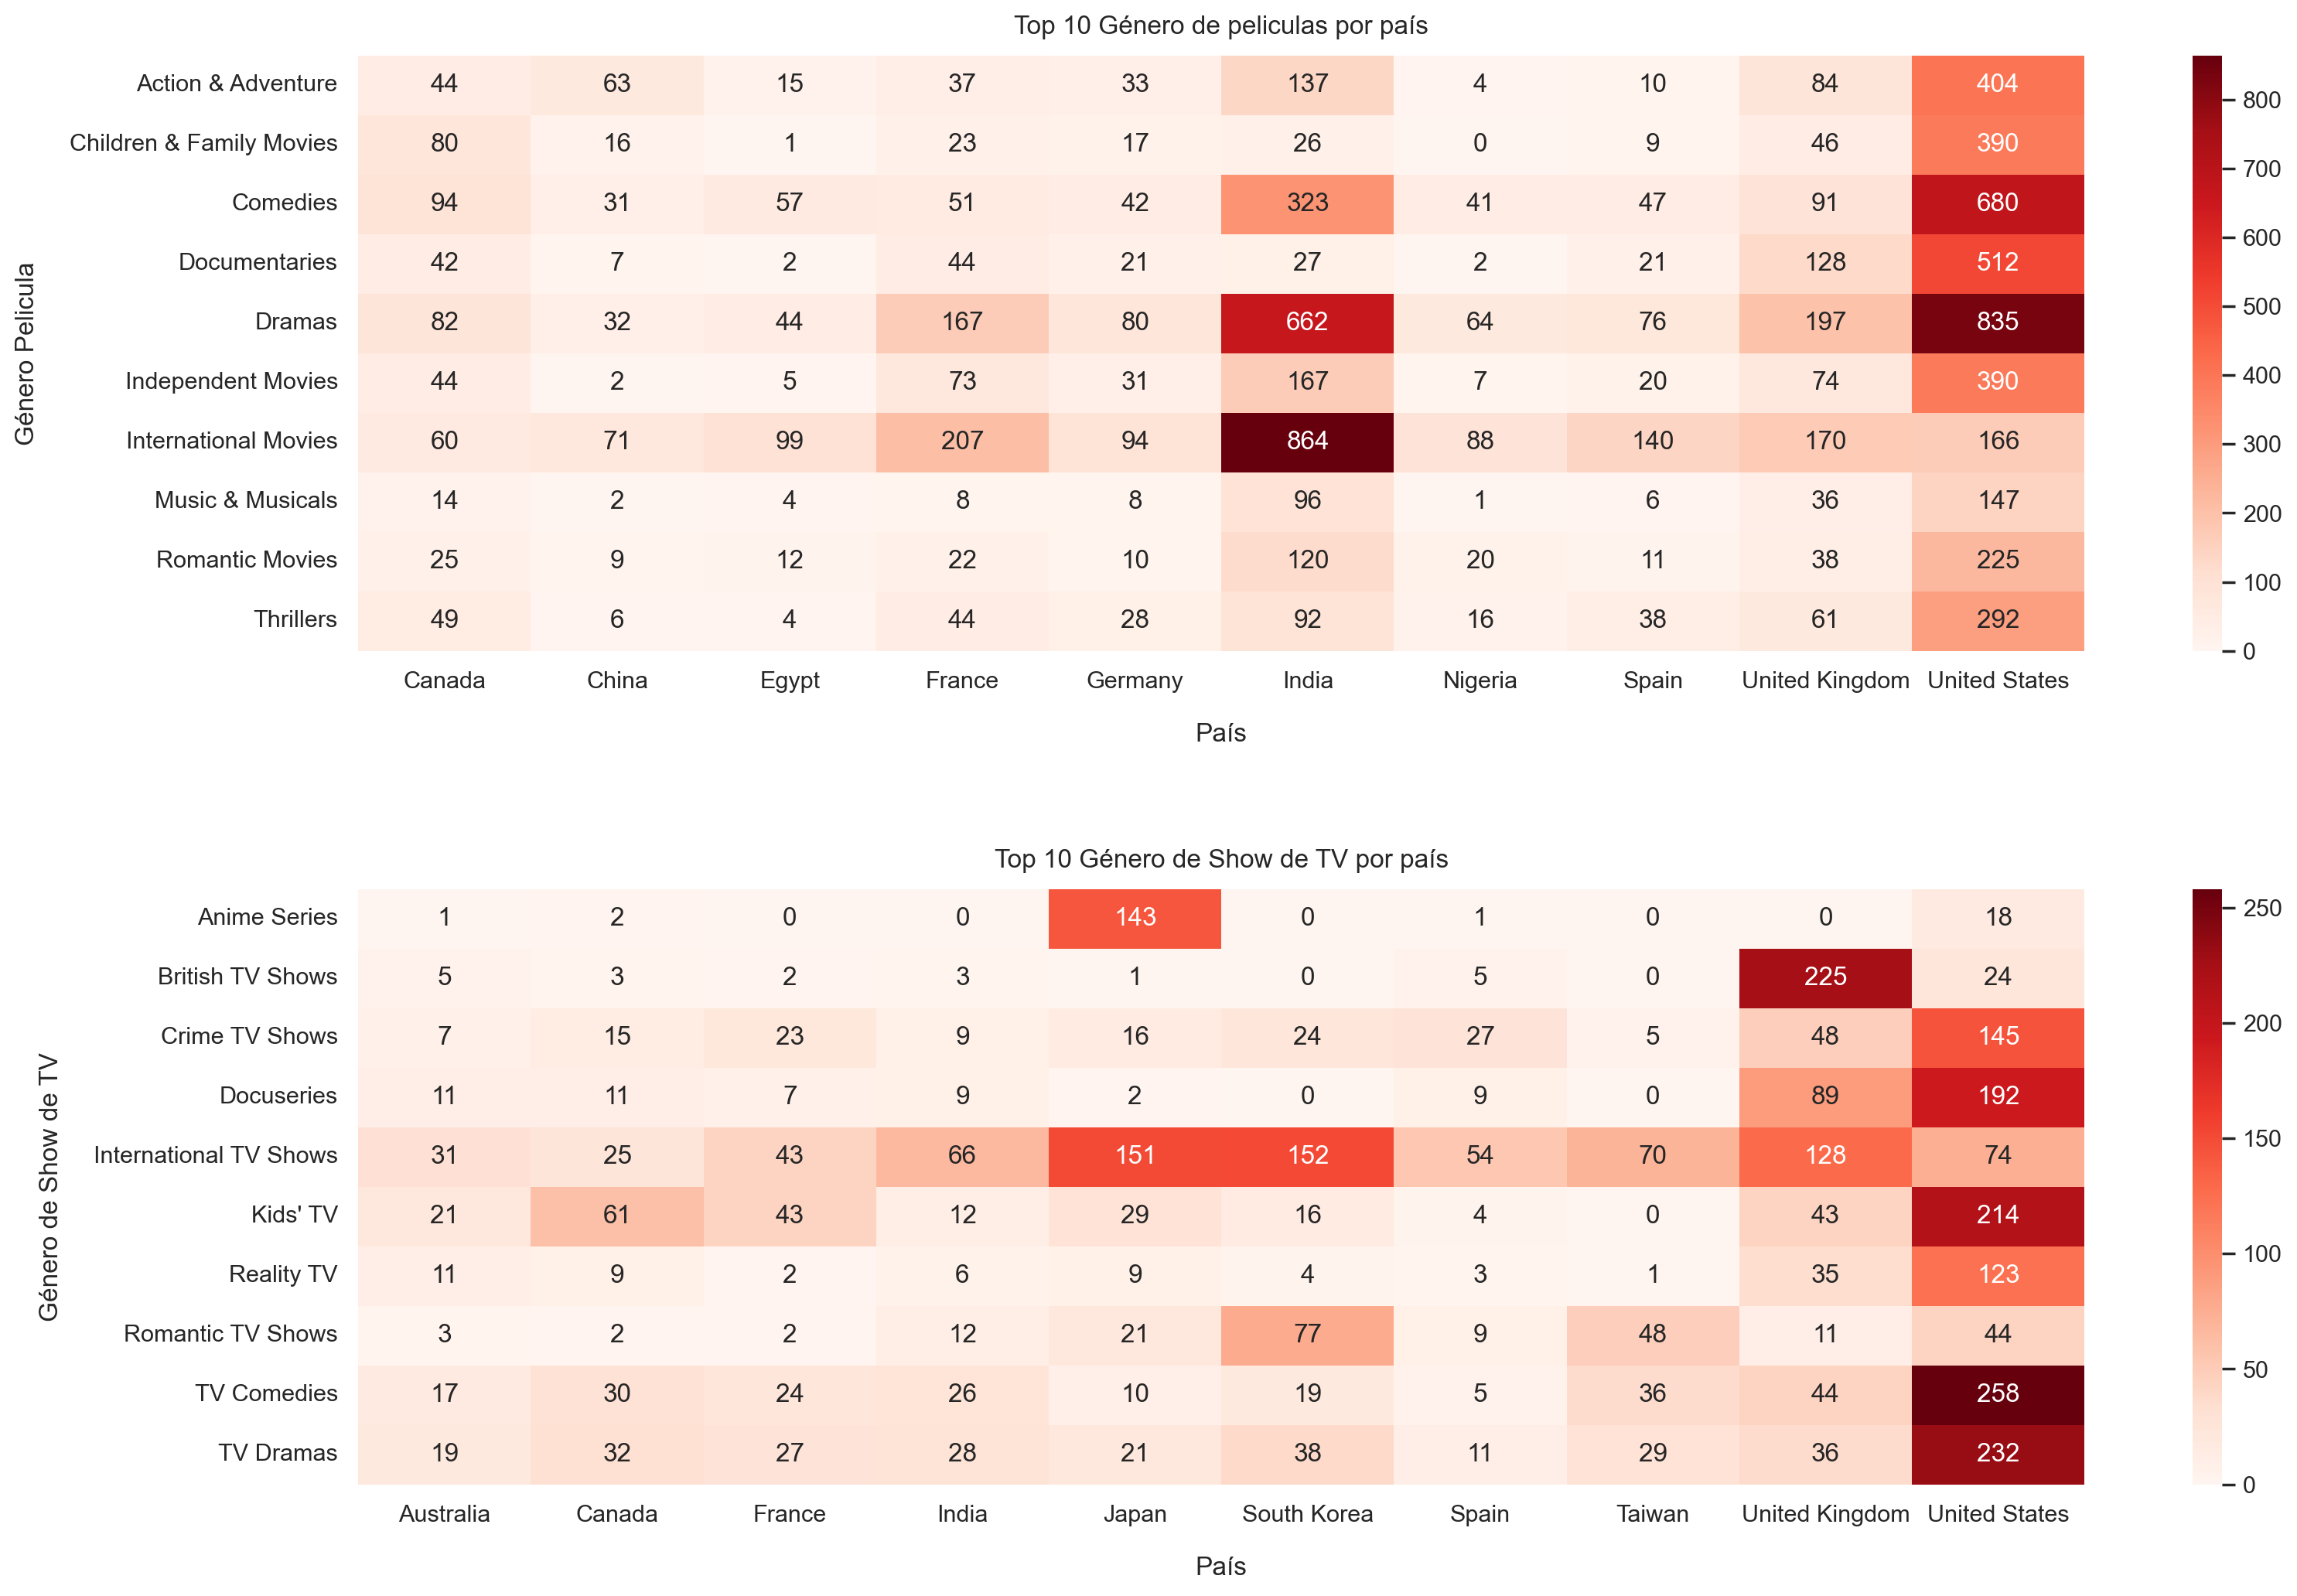

In [ ]:
# Cuáles son los géneros Top 10 de Películas y Show TV por país en Netflix?

country_data = explode_data(data, 'country', 'country', 'title')
genre_data = explode_data(data, 'listed_in', 'genre', 'title')
genre_data_type = explode_data(data, 'listed_in', 'genre', 'type')

genre_data_type = genre_data_type.value_counts().reset_index(level=1)
top_movie_genres = list(genre_data_type.loc['Movie'].head(10)['genre'].values)
top_tv_genres = list(genre_data_type.loc['TV Show'].head(10)['genre'].values)

df = country_data.merge(genre_data).drop('title', axis=1)
df1 = df[df['genre'].isin(top_movie_genres)]
df2 = df[df['genre'].isin(top_tv_genres)]

def make_data(df):
    return (
        df
        [df['country'].isin(df['country'].value_counts().head(10).index)]
        .value_counts()
        .reset_index()
        .pivot("genre", "country", 0)
        .fillna(0)
        .apply(lambda x: x.astype('int'))
        )

df1 = make_data(df1)
df2 = make_data(df2)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,12), dpi=200)
fig.subplots_adjust(hspace=0.4)

sns.heatmap(df1, annot=True, fmt="d", cmap='Reds', ax=ax1)
ax1.set_xlabel('País', labelpad=14)
ax1.set_ylabel('Género Pelicula', labelpad=14)
ax1.set_title('Top 10 Género de peliculas por país', pad=10)

sns.heatmap(df2, annot=True, fmt="d", cmap='Reds', ax=ax2)
ax2.set_xlabel('País', labelpad=14)
ax2.set_ylabel('Género de Show de TV', labelpad=14)
ax2.set_title('Top 10 Género de Show de TV por país', pad=10)
plt.show()

In [ ]:
''' De los países que más consumen películas, Estados Unidos lidera con la categoría de dramas, mientras que India es el país que más consume películas internacionales.
En Nigeria, no se reporta actividad en el género de películas familiares, y también hay una muy baja afluencia en las películas musicales.

Las series de anime son poco visitadas en países como Francia, India, Taiwán y el Reino Unido, con una popularidad de 0.
El país con el mayor indicador es Estados Unidos con el género de comedias, mientras que Corea y Japón comparten la popularidad de los programas de televisión (TV shows).

Las series británicas son más populares en Inglaterra, y en un mayor número de popularidad, los programas para niños (kids shows) son más populares en Estados Unidos. '''

